In [1]:
import pandas as pd
import numpy as np
from api.gsv import GSV

**Read csv file**

In [2]:
csv_path = 'data/12_21_bicycle.csv'
df = pd.read_csv(csv_path, encoding='cp949').astype("string")
print('Number of data %d' % len(df))

Number of data 4357


**Drop unnecessary colums**

In [3]:
df.drop(columns='다발지역폴리곤', inplace=True)

**Filltering data**

In [4]:
new_df = df.loc[df['시도시군구명'].str.contains('서울특별시')]
print('Number of df[\'서울특별시\'] data is %d' % len(new_df))

Number of df['서울특별시'] data is 1683


In [5]:
new_df = new_df.loc[new_df['사고다발지ID'].str.contains('2022|2021|2020')]
print('Number of 2018 to 2022 data is %d' % len(new_df))

Number of 2018 to 2022 data is 437


**Sample of data**

In [6]:
data = new_df.iloc[0]
data

사고다발지FID                     6618237
사고다발지ID                      2020037
법정동코드                     1111012300
지점코드                        11110001
시도시군구명                    서울특별시 종로구1
지점명         서울특별시 종로구 서린동(종로구청입구 부근)
발생건수                               5
사상자수                               5
사망자수                               0
중상자수                               2
경상자수                               3
부상신고자수                             0
경도                  126.979382406174
위도                   37.569908240574
Name: 3315, dtype: string

**Load config json file and Get google street view api key**

In [7]:
import json
from typing import Final
with open('config.json') as cf:
    cfg_data = json.load(cf)
API_KEY: Final = cfg_data['GSV_API_KEY']

gsv = GSV(API_KEY)

**Sample of image**

lat 37.569908240574, lon126.979382406174, address 서울특별시 종로구 서린동(종로구청입구 부근)


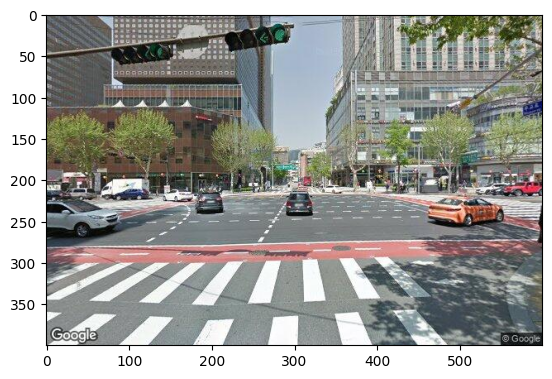

In [8]:
import matplotlib.pyplot as plt
lat, lon = float(data['위도']), float(data['경도']) # latitude, longitude
address = data['지점명']

img = gsv.get_gsv_veiw_image(lat, lon)

if img is None:
    print('Fail')

print(f'lat {lat}, lon{lon}, address {address}')
# convert image bgr to rgb for matplotlib
rgb_img = img[:,:,::-1]
plt.imshow(rgb_img)

lat 37.569908240574, lon126.979382406174, address 서울특별시 종로구 서린동(종로구청입구 부근)


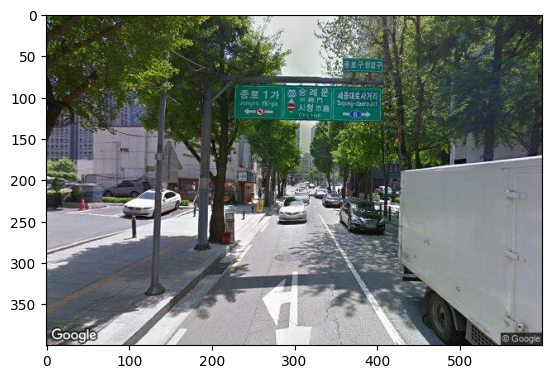

In [9]:
img = gsv.get_gsv_veiw_image(lat, lon, heading=180)

if img is None:
    print('Fail')

print(f'lat {lat}, lon{lon}, address {address}')
# convert image bgr to rgb for matplotlib
rgb_img = img[:,:,::-1]
plt.imshow(rgb_img)